<a href="https://colab.research.google.com/github/hajonghyun/inflearn_ML_from_the_foundation/blob/main/4_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---


# 선형회귀 이론 및 실습 # 4


---
---



## velog 주소

https://velog.io/@changhtun1/python-%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%EC%8B%A4%EC%8A%B5

## 유튜브 주소

https://youtu.be/OAg7vOFjVck?si=rPLVlwN58ZtPR1J3

## 연습 데이터 url

https://drive.google.com/drive/folders/149jcCyJFKKG5MFaPNWnYYqM2EkzgRz2P?usp=sharing


---
---


# 선형 회귀 모델

## 🧮 선형 회귀 모델 기본 정리

선형 회귀는 다음과 같은 가설 함수를 사용합니다:

$$
\hat{y} = X \theta
$$

-  \hat{y} : 예측값 (벡터)  
- \( X \): 입력 데이터 행렬 (샘플 수 \( m \), 특성 수 \( n \))  
- \( \theta \): 학습해야 할 파라미터 벡터 (\( n \times 1 \))

## 🎯 목적: 손실 함수 최소화

가장 일반적으로 사용하는 손실 함수는 평균제곱오차(MSE, Mean Squared Error)입니다:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m} \| X\theta - y \|^2
$$

---


# 선형 회귀 모델의 여러가지 최적화 방법

##📌 1. 정규 방정식 (Normal Equation)
🔧 핵심 원리
- 폐쇄형 수식(closed-form solution)을 이용하여 가중치를 한 번에 계산하는 방법.

- 수학적으로 손실 함수(예: MSE)를 최소화하는 해를 직접 구하는 방식.

💡 머신러닝 관점
- 데이터의 크기가 작거나 중간 규모일 때 빠르고 정확함.

- 행렬 연산(역행렬 계산)이 필요하므로 데이터 수가 많으면 계산 비용이 큼.

🧃 예시
- 마치 시험 문제를 푸는 공식이 있는 상황과 같아요.
- "2차 방정식을 풀어라" → 근의 공식에 숫자만 넣으면 답이 나오죠.
- 데이터도 적고 계산도 간단할 때 유리합니다.



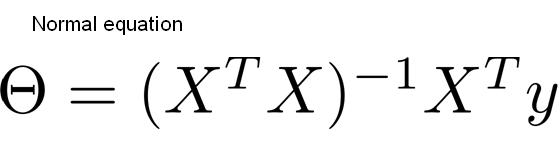


### ✅ 정규방정식 도출 과정

손실 함수 \( J(\theta) \)를 최소화하는 \( \theta \)를 찾기 위해 미분해서 0으로 놓고 풉니다.

1. 손실 함수:

$$
J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)
$$

2. 미분:

$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

3. 최소화 조건:

$$
X^T X \theta = X^T y
$$

---

### 🟨 최종 정규방정식 (Normal Equation)

정규방정식을 정리하면 다음과 같습니다:

$$
\boxed{\theta = (X^T X)^{-1} X^T y}
$$
---


### 🔍 예시: 키(신장)으로 몸무게 예측하기

| 사람 | 키(cm) | 몸무게(kg) |
|------|--------|------------|
| A    | 160    | 55         |
| B    | 170    | 65         |
| C    | 180    | 75         |

- \( X \) 행렬 (Bias Term 포함):

$$
X = \begin{bmatrix}
1 & 160 \\
1 & 170 \\
1 & 180
\end{bmatrix}, \quad
y = \begin{bmatrix}
55 \\
65 \\
75
\end{bmatrix}
$$

- 정규방정식에 대입:

1. \( X^T X \), \( X^T y \) 계산  
2. 역행렬 계산 → \( \theta = (X^T X)^{-1} X^T y \)

→ 최적의 \( \theta_0 \)(절편), \( \theta_1 \)(기울기) 값을 구할 수 있습니다!

---

### ⚠️ 정규방정식의 단점

- 역행렬 계산 필요 → 시간 복잡도 \( O(n^3) \)
- \( X^T X \)가 **역행렬을 가질 수 없는 경우**도 있음 (예: 다중공선성)
- 고차원 데이터셋에서는 **경사 하강법(Gradient Descent)**이 더 효율적임

---

### bias term이란?
선형 회귀(linear regression)는 종속 변수 \( y \)와 독립 변수 \( x \) 사이의 선형 관계를 모델링하는 기법입니다.  
기본 수식은 다음과 같습니다:

\[
y = w_1 x + b
\]

- \( w_1 \): 입력 \( x \)에 대한 가중치 (weight)  
- \( b \): 편향 항 (bias term, 절편)

여기서 **bias term \( b \)**는 데이터가 원점을 지나지 않아도 되는 자유도를 제공합니다.  
예를 들어, 키가 0cm인 사람이 체중이 0kg이어야 할 이유는 없습니다.  
그래서 **bias term은 꼭 필요합니다.**

그런데 이 모델을 **행렬로 계산하려면** 문제가 하나 생깁니다.

\[
y = Xw + b
\]

이렇게 계산하면 bias term \( b \)가 벡터 형태로 분리돼 있어 계산이 불편합니다.  
→ 그래서 \( b \)를 포함할 수 있도록 입력 \( X \)에 **1로 이루어진 열**을 추가합니다.

즉, 새로운 모델은 이렇게 됩니다:

\[
X' =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix},


w' =
\begin{bmatrix}
b \\
w_1
\end{bmatrix}
\quad \Rightarrow \quad
y = X' w'
\]


**1을 추가하는 이유**는 모든 샘플에 동일한 상수를 곱해서  
**bias term을 모델 내에서 일관되게 곱셈 연산으로 처리하기 위함입니다.**


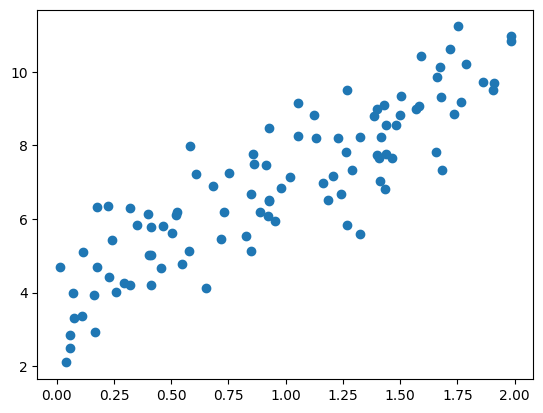

In [1]:
# 정규방정식 실습

# 0. x,y 데이터 값 만들고 scatter로 시각화하기


import matplotlib.pyplot as plt
import numpy as np

x = 2*np.random.rand(100,1) # 0~2 사이의 균일분포 => shape: 100*1
y = 4 + 3*x + np.random.randn(100,1) # 정규분포 => shape: 100*1

plt.scatter(x,y)
plt.show()


In [2]:
# 1. bias term 추가하기
bias_term = np.ones((100,1))
x_b = np.c_[bias_term,x]
x_b

array([[1.        , 1.38401757],
       [1.        , 0.54861542],
       [1.        , 1.39773288],
       [1.        , 1.16181081],
       [1.        , 0.71795572],
       [1.        , 1.43668405],
       [1.        , 0.45694086],
       [1.        , 0.41037182],
       [1.        , 0.82827983],
       [1.        , 1.22816145],
       [1.        , 1.05543147],
       [1.        , 1.98358746],
       [1.        , 1.78611059],
       [1.        , 0.97835076],
       [1.        , 0.57983976],
       [1.        , 1.65844553],
       [1.        , 0.16093798],
       [1.        , 1.32516173],
       [1.        , 1.68256495],
       [1.        , 1.58928089],
       [1.        , 1.40841748],
       [1.        , 0.32045938],
       [1.        , 0.40272364],
       [1.        , 0.41153396],
       [1.        , 0.72986408],
       [1.        , 0.05663601],
       [1.        , 0.86225942],
       [1.        , 1.02020538],
       [1.        , 0.16528968],
       [1.        , 1.13285182],
       [1.

In [3]:
# 1. bias term 추가하기2
bias_term = np.ones((100,1))
x_b = np.column_stack((bias_term,x))
x_b

array([[1.        , 1.38401757],
       [1.        , 0.54861542],
       [1.        , 1.39773288],
       [1.        , 1.16181081],
       [1.        , 0.71795572],
       [1.        , 1.43668405],
       [1.        , 0.45694086],
       [1.        , 0.41037182],
       [1.        , 0.82827983],
       [1.        , 1.22816145],
       [1.        , 1.05543147],
       [1.        , 1.98358746],
       [1.        , 1.78611059],
       [1.        , 0.97835076],
       [1.        , 0.57983976],
       [1.        , 1.65844553],
       [1.        , 0.16093798],
       [1.        , 1.32516173],
       [1.        , 1.68256495],
       [1.        , 1.58928089],
       [1.        , 1.40841748],
       [1.        , 0.32045938],
       [1.        , 0.40272364],
       [1.        , 0.41153396],
       [1.        , 0.72986408],
       [1.        , 0.05663601],
       [1.        , 0.86225942],
       [1.        , 1.02020538],
       [1.        , 0.16528968],
       [1.        , 1.13285182],
       [1.

In [4]:
# 1. bias term 추가하기3
bias_term = np.ones((100,1))
x_b = np.concatenate((bias_term,x),axis=1)
x_b

array([[1.        , 1.38401757],
       [1.        , 0.54861542],
       [1.        , 1.39773288],
       [1.        , 1.16181081],
       [1.        , 0.71795572],
       [1.        , 1.43668405],
       [1.        , 0.45694086],
       [1.        , 0.41037182],
       [1.        , 0.82827983],
       [1.        , 1.22816145],
       [1.        , 1.05543147],
       [1.        , 1.98358746],
       [1.        , 1.78611059],
       [1.        , 0.97835076],
       [1.        , 0.57983976],
       [1.        , 1.65844553],
       [1.        , 0.16093798],
       [1.        , 1.32516173],
       [1.        , 1.68256495],
       [1.        , 1.58928089],
       [1.        , 1.40841748],
       [1.        , 0.32045938],
       [1.        , 0.40272364],
       [1.        , 0.41153396],
       [1.        , 0.72986408],
       [1.        , 0.05663601],
       [1.        , 0.86225942],
       [1.        , 1.02020538],
       [1.        , 0.16528968],
       [1.        , 1.13285182],
       [1.

✅ np.c_와 비슷한 역할을 하면서 더 범용성 있는 함수들
1. np.column_stack() – 가장 비슷하면서도 명확한 함수
```python
np.column_stack((a, b))
```
np.c_[a, b]와 거의 동일한 동작을 해.

1차원 배열을 **자동으로 열벡터(2D)**로 바꾼 뒤, 옆으로 붙여줌.

문법도 함수 스타일이라 코드 리뷰에서 이해하기 쉽고, 가독성이 좋음.

2. np.concatenate() – 범용성 가장 높음
```python
np.concatenate([a, b], axis=1)
```
다양한 방향으로 붙일 수 있고, 1차원 이상부터 지원함.

단점: 1차원 배열은 자동으로 2차원으로 바꿔주지 않음 → 직접 reshape 해야 함.

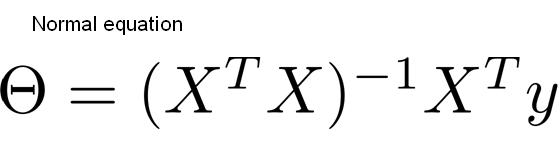

In [5]:
# 2. 정규방정식으로 theta best 구하기 (y = X*(theta)에서 데이터들을 가장 잘 표현하는 가중치 theta 구하기)

theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.82777074],
       [3.22573164]])

### ✅ 벡터 내적 vs 행렬 곱: 개념 차이

🟢 벡터 내적 (dot product)

```
a = [a₁, a₂],    b = [b₁, b₂]

a · b = a₁·b₁ + a₂·b₂ = 스칼라
```

즉, 두 벡터의 **유사도** 또는 **투영 관계**를 측정하는 연산이야.  
👉 `np.dot(a, b)`에서 `a`, `b`가 둘 다 1차원일 때, 이게 수행돼.

---

🟢 행렬 곱 (matrix multiplication)

```
C = A · B   (단, A는 (m×n), B는 (n×p))
```

→ 결과는 `(m×p)` 크기의 행렬  
👉 `np.dot(A, B)`에서 `A`와 `B`가 2D일 때 사용됨.


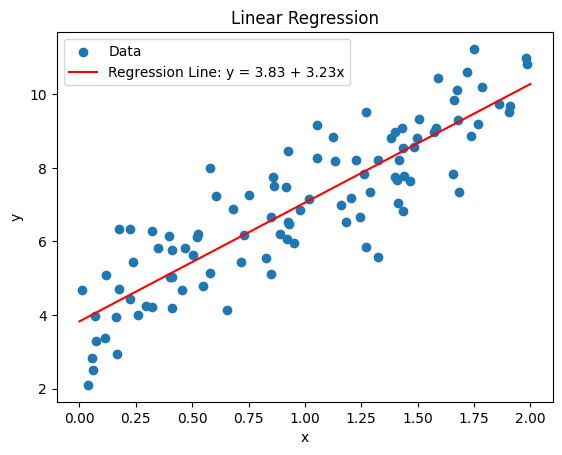

In [6]:
# prompt: 위에서 구한 theat best로 선형회귀를 완료한 일차함수를 그려줘

import matplotlib.pyplot as plt
import numpy as np

# Assuming theta_best is already calculated as in the provided code
# If not, uncomment the following lines and run them first:
# x = 2*np.random.rand(100,1)
# y = 4 + 3*x + np.random.randn(100,1)
# bias_term = np.ones((100,1))
# x_b = np.c_[bias_term,x]
# theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

# Extract theta_0 (intercept) and theta_1 (slope)
theta_0 = theta_best[0, 0]
theta_1 = theta_best[1, 0]

# Create the line based on theta_best
x_line = np.linspace(0, 2, 100)  # Create 100 points between 0 and 2
y_line = theta_0 + theta_1 * x_line

# Plot the data points and the regression line
plt.scatter(x, y, label='Data')
plt.plot(x_line, y_line, color='red', label=f'Regression Line: y = {theta_0:.2f} + {theta_1:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

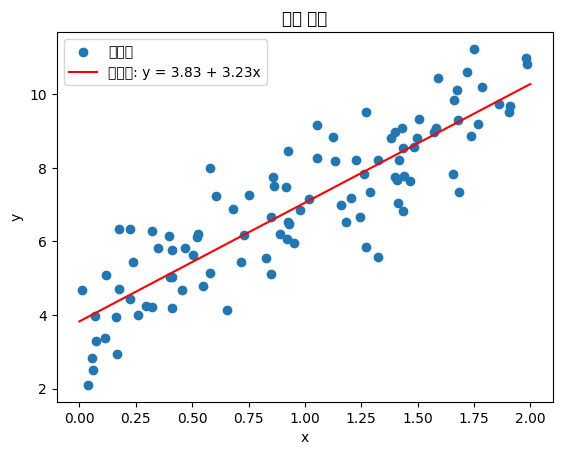

In [7]:
# theta_0 (절편)과 theta_1 (기울기) 추출
theta_0 = theta_best[0, 0]
theta_1 = theta_best[1, 0]

# x 좌표 0과 2에 대한 y 값 계산
x_line = np.array([0, 2])
y_line = theta_0 + theta_1 * x_line

# 데이터 점과 회귀선 그리기
plt.scatter(x, y, label='데이터')
plt.plot(x_line, y_line, color='red', label=f'회귀선: y = {theta_0:.2f} + {theta_1:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('선형 회귀')
plt.legend()
plt.show()

## 📌2. sklearn 패키지를 사용해서 theta best 네줄만에 만들기

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)

[3.82777074] [[3.22573164]]


## 📌 3. 경사 하강법 (Gradient Descent)
🔧 핵심 원리

- 손실 함수의 기울기를 이용하여 점진적으로 가중치를 업데이트.

- 반복적인 계산으로 점점 더 손실이 작아지는 방향으로 이동.

💡 머신러닝 관점

- 대규모 데이터셋에서 유리함.

- 학습률(learning rate), 수렴 조건 등 하이퍼파라미터 조절이 중요.

🧃 예시
- 등산 중 길을 잃었을 때, 가장 낮은 지형을 찾아 계속 내려가는 느낌이에요.
손전등을 켜고, "조금 더 낮은 쪽으로" 한 걸음씩 가는 식이죠.
- 짙은 안개 속, 앞이 전혀 보이지 않고 오로지 발 끝에 산의 기울기만 느낄 수 있다고 생각해보자. 이 숲을 벗어나기 위한 가장 좋은 방법은 가장 기울기가 급한 길을 따라서 내려가는 것이다. 이것이 경사 하강법 원리다.

## 과정

1. 무작위로 벡터 θ를 초기화
2. 파라미터 벡터 θ에 대해 비용 함수(Loss Function)의 현재 그래디언트를 계산
3. 그래디언트가 감소하는 방향으로 진행하면서, 최종적으로 계산된 그래디언트가 0이 되면 최솟값에 도달하도록 한다.

- 경사 하강법에서 최적화 시키는 방향으로 가게 하는 중요한 하이퍼파라미터 step(learning rate)를 결정해야 한다.

- 실제 모든 비용함수는 위와 같이 quadratic(이차원)하게 표현되지 않고 솟았다가 내려앉았다가 한다. 따라서 learning rate를 잘 설정해야 local minumum(지역 최소값)에 빠지지 않고 global minumum(최적의 값)으로 잘 수렴할 수 있다.

- 다행히도 **선형 회귀의 MSE 비용 함수는 convex function(볼록 함수)이기 때문에, local minum이 없고, global minimum만 존재**한다.


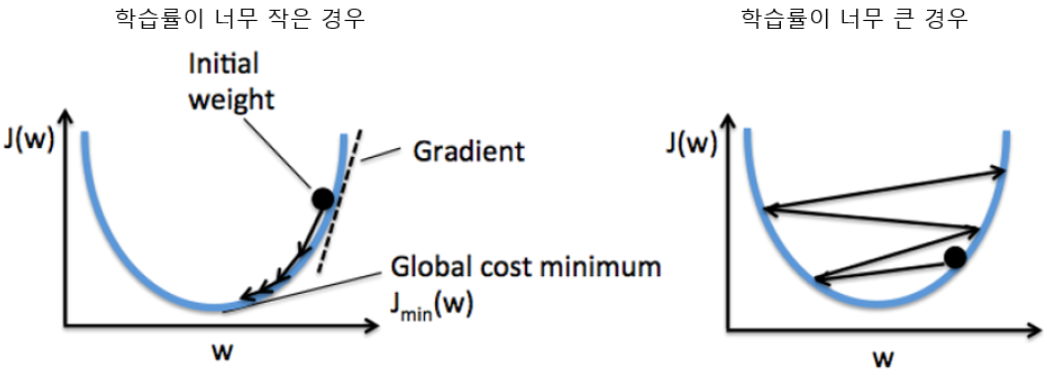

---
### 특성 스케일이란?

✅ 특성 스케일(Feature Scaling)이란?

– 핵심 원리와 배경 설명
머신러닝에서 입력 데이터는 여러 개의 **특성(feature)**으로 구성돼.
예를 들어 집값 예측 모델에서는 다음과 같은 특성이 있을 수 있어:

- 면적 (예: 45평 → 숫자 큼)

- 방 개수 (예: 3개 → 숫자 작음)

- 지하철 거리 (예: 0.3km → 매우 작음)

이렇게 **특성마다 숫자의 범위(스케일)**가 매우 다를 수 있어.
→ 이걸 그대로 모델에 넣으면, 값이 큰 특성이 학습에 너무 많은 영향을 줘버려.

그래서 모든 특성의 스케일을 비슷하게 맞춰주는 작업이 바로 **Feature Scaling (특성 스케일링)**이야.

🧠 실생활 예시로 쉽게 이해하기

쇼핑몰에서 옷을 고른다고 해보자.

가격은 “만원 단위”로 적혀 있고

평점은 “1~5점”으로 적혀 있어

이 두 값을 더해서 좋은 옷을 고르라고 하면...
→ 당연히 가격이 훨씬 커서 평점은 거의 무시되겠지?

특성 스케일링은 마치 가격을 01 사이 비율로 바꾸고, 평점도 01 사이로 맞추는 작업이야.
이제 두 값이 동등하게 비교 가능해지는 거지!

---
## ✅ 경사 하강법에서 특성 스케일이 다른 경우 무슨 일이 벌어질까?
문제 상황:
예를 들어 다음과 같은 2개의 특성이 있는 모델을 생각해보자:

𝑥
1
x
1
​
 : 값의 범위가 0 ~ 1

𝑥
2
x
2
​
 : 값의 범위가 0 ~ 1000

그럼 비용 함수
𝐽
(
𝜃
1
,
𝜃
2
)
J(θ
1
​
 ,θ
2
​
 )는 θ 공간에서 비대칭적으로 길쭉한 타원 모양으로 생기게 돼.

 🧠 왜 그런 모양이 될까?

비용 함수
𝐽
(
𝜃
)
J(θ)는 특성의 영향력을 따라 변형돼.
특성 중 하나가 값이 크면, 그 특성의 방향으로 기울기 변화가 더 커지기 때문이야.

𝑥
2
x
2
​
 는 값이 커서 θ에 작은 변화만 줘도 오차가 크게 달라짐 → 기울기가 크다

𝑥
1
x
1
​
 은 값이 작아서 θ를 바꿔도 오차 변화가 작음 → 기울기가 작다

 📉 그래서 gradient descent는 어떻게 움직이냐면?

- 이상적인 경우: ↓ 방향으로 바로 쭉 내려감

- 특성 스케일이 다르면:
➤ 기울기 한쪽이 너무 크고, 다른 쪽이 작아서
➤ **지그재그(Zig-zag)**로 내려오게 돼
➤ 결과적으로 수렴 속도가 훨씬 느려짐

✅ 이걸 방지하는 방법? → 특성 스케일링
스케일링을 하면 모든 특성이 비슷한 크기가 돼서 등고선이 원형에 가까워짐.
→ 경사 하강법이 곧바로 최솟값 방향으로 빠르게 수렴함.

✨ 결론 한 줄 요약
스케일이 다르면, 경사하강법이 갈 길을 모르고 지그재그로 헤맨다.
그래서 스케일링은 필수 전처리 중 하나야!

**"경사 하강법 전에는 반드시 모든 특성을 같은 스케일을 사용하여서 데이터 변환을 하여야 한다."**

# 📌 3-1. 배치 경사 하강법 (Batch Gradient Descent)
🔧 핵심 원리
전체 데이터를 이용해 기울기를 계산하고, 매번 전체 데이터 기준으로 파라미터를 갱신.

💡 머신러닝 관점
가장 정확한 방향으로 업데이트하지만, 계산량이 많음.

메모리가 충분할 때만 사용 가능.

🧃 예시
시험을 보기 전에 교과서 전체를 완벽하게 복습하고 가는 것과 같아요.
철저하지만 시간이 오래 걸립니다.

---
선형회귀 함수

$$
\hat{y} = X \theta
$$

-  \hat{y} : 예측값 (벡터)  
- \( X \): 입력 데이터 행렬 (샘플 수 \( m \), 특성 수 \( n \))  
- \( \theta \): 학습해야 할 파라미터 벡터 (\( n \times 1 \))
---

### Gradient 구하는 방법1: 원소 기준 미분

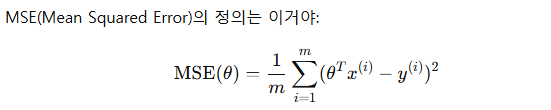

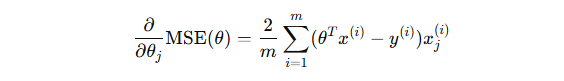

### Gradient 구하는 방법2: 행렬 기준 미분

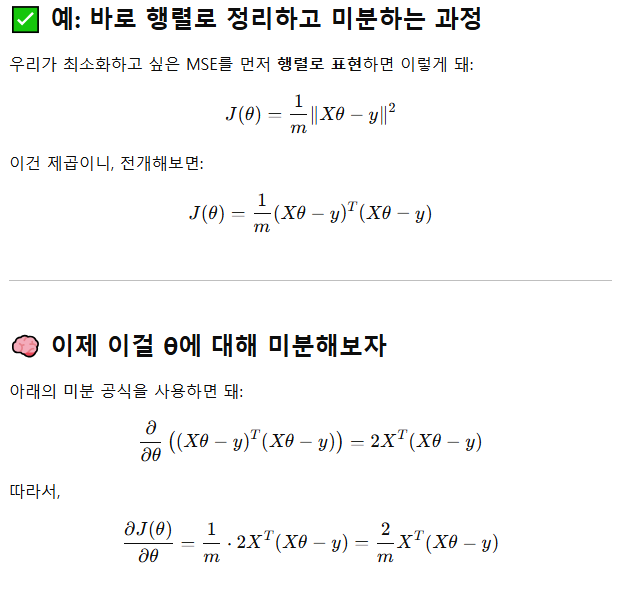

### W = W - a * Gradient

- 학습률(alpha)에 그래디언트 벡터를 곱하고 이전 weight에 빼면 된다.



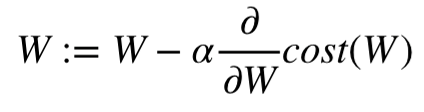

In [62]:
import numpy as np

x = 2* np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

# 1. bias term 붙이기
x_b = np.concatenate([np.ones((100,1)),x],axis=1)

In [63]:
# 2. theta 초기값
theta = np.random.randn(2,1)

In [64]:
# learning rate 설정, m설정, 반복횟수 설정
m= x_b.shape[0]
learning_rate = 0.001
iterations = 1000

In [65]:
# 3. gradient
#gradient = 2/m *(x_b).T * x_b*theta
#theta = theta - learning_rate*gradient

In [66]:
# 반복문 안에서 합치기

for i in range(iterations):
    gradient = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - learning_rate*gradient


In [61]:
theta

array([[3.55055655],
       [3.22331673]])

In [44]:
# x 좌표 0과 2에 대한 y 값 계산
x_val = np.array([0, 2])
y_val = theta[0] + theta[1] * x_val

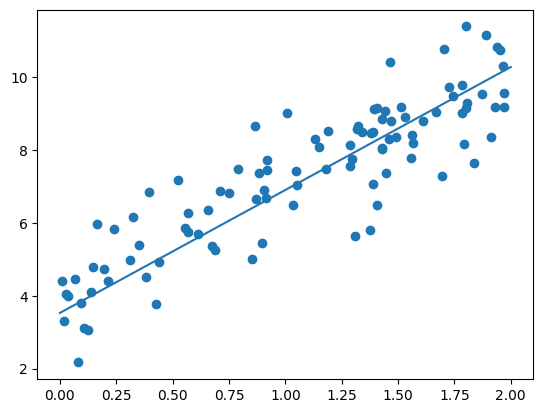

In [45]:
plt.scatter(x,y)
plt.plot(x_val,y_val)

In [43]:
# 이건 정규방정식 사용.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)

[4.0567571] [[3.00269177]]


# 📌 3. 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)

🔧 핵심 원리

- 전체 데이터가 아니라 한 개의 샘플을 무작위로 선택하여 그 샘플에 대한 그래디언트를 계산한다.

- 매우 큰 훈련 데이터 역시 처리할 수 있다.

- 요동치면서 최적의 해에 가까워지기는 하겠지만, 최소값에 도달하지 않을 수도 있다.

- 하지만 비용 함수가 MSE처럼 convex(볼록 함수)하지 않고 불균형하다면 배치 경사 하강법보다 global minimum에 도달할 가능성이 높다.(장점)

- 무작위성으로 인한 global minimum에 도달하지 않을 수 있다는 단점을 극복하기 위해서, 학습률을 점진적으로 감소시키는 해결책이 있다.(시작: 학습률 크게 => 진행단계: 학슬률 작게)
- 위 해결책을 위한 매 반복 학습률 결정 함수를 learning schedule(학습 스케쥴)이라고 부른다.

In [67]:
# 확률적 경사 하강법 구현(implementation)
epochs = 1000
t0,t1 = 5,50 # 학습 스케쥴 (하이퍼 파라미터)
m = x_b.shape[0] # 100개 (x 데이터)

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for epoch in range(epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0 ~ m-1까지 랜덤 숫자 1
    xi = x_b[random_index:random_index:+1] # 1 x 2 크기
    yi = y[random_index:random_index+1] # 1 x 1 크기
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi) # 1 => mini_m
    learning_rate = learning_schedule(epoch*m + i)
    theta = theta - learning_rate * gradients

theta

array([[-0.36361221],
       [-0.05694562]])

📌 왜 t0와 t1이 필요한가? 1/t만 쓰면 안 되는 이유

1. 핵심 원리와 배경
단순히 이렇게 쓰면:

```python
learning_rate = 1 / t
```
- t = 0일 때 → ❌ 0으로 나눌 수 없어서 에러!
- t = 1일 때 → learning rate = 1 → 너무 크다! 튐!

그래서 초기 학습률이 너무 크거나, 0으로 나누는 문제를 피하기 위해
👉 t1을 넣어주는 거야:

```python
learning_rate = t0 / (t + t1)
```
- t1은 초기 값 안정화 역할 (0으로 나누는 문제 방지 + 초기 학습률 제어)

- t0는 전체적인 스케일 조절 (학습률의 크기 조절)

2. 실생활에서 이해하기 쉬운 예시
    💡 차가 가속하는 걸 생각해보자.

    시동 걸자마자 100km/h로 튀면 위험하지?
    그래서 초반엔 서서히 속도를 높이고, 나중엔 안정적으로 유지하거나 서서히 줄여야 해.

    1/t는 시동 걸자마자 속도 무한대 (t=0에서 나눗셈 에러),
    t0 / (t + t1)은 시동도 부드럽게 걸고, 점점 속도 줄여주는 형태

3. 사람들이 흔히 하는 실수나 오해

    “1/t가 더 간단한데 왜 굳이 복잡하게 만들어?”
    
    → 실은 수학적으로 간단하지만, 실제로 돌리면 튀거나 발산하거나 에러 발생 가능성이 높음.

“초기 학습률을 그냥 작게 하면 되지 않나?”
→ 그럴 수도 있지만, 문제는 1/t는 너무 빠르게 학습률이 작아짐 → 금방 "학습을 멈춘 것처럼" 돼버릴 수 있어.
→ t0는 그걸 늦춰서 조절 가능한 '속도 조절기' 역할을 해줘.